In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Load Movies Dataset

In [42]:
df = pd.read_csv('datasets/movies_data.csv')

In [43]:
df.head()

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year
0,Batti Gul Meter Chalu,2,50.0,37.0,6.3,1552,2018
1,Dangal,6,90.0,370.0,8.5,105480,2016
2,Manmarziyaan,3,30.0,26.0,7.0,1836,2018
3,Sui Dhaaga: Made in India,4,50.0,55.0,6.9,1342,2018
4,Stree,6,25.0,127.0,8.3,7801,2018


## Understand and Preprocess Data 

In [44]:
movie = df[df.Budget != 0]  ## Take movies which have budget greater than 0
movie.shape

(703, 7)

In [45]:
movie.isnull().sum()      ## check for null values

Movie        0
Target       0
Budget       0
BoxOffice    0
Rating       0
Votes        0
Year         0
dtype: int64

In [46]:
# movie.dropna()

In [47]:
movie.describe()    ## Understand movies features

,Target,Budget,BoxOffice,Rating,Votes,Year
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.149360,30.952845,38.590199,5.831721,8837.796586,2012.721195
std,1.587575,28.509420,54.521579,1.555828,17694.959424,3.649407
min,1.000000,0.650000,0.040000,0.000000,0.000000,2000.000000
25%,2.000000,12.000000,7.000000,4.800000,1177.000000,2010.000000
50%,3.000000,23.000000,21.000000,5.900000,3463.000000,2013.000000
75%,4.000000,40.000000,47.750000,7.100000,9295.000000,2016.000000
max,6.000000,250.000000,511.000000,9.000000,282358.000000,2018.000000


### Understanding data distribution through boxplots and distplots

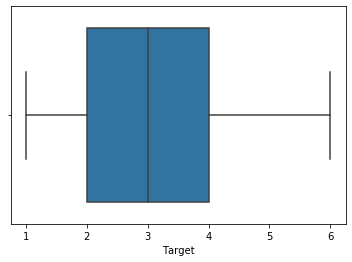

In [48]:
sn.boxplot(movie["Target"])

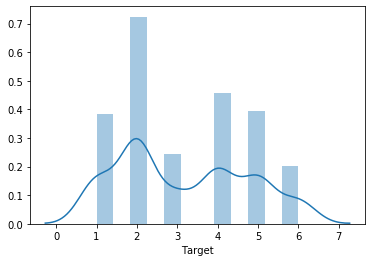

In [49]:
sn.distplot(movie["Target"])

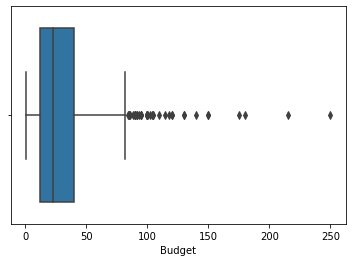

In [50]:
sn.boxplot(movie["Budget"])

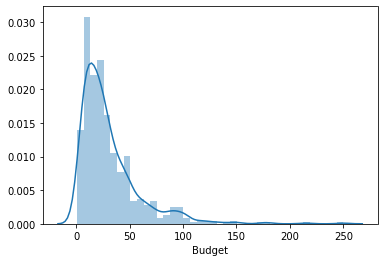

In [51]:
sn.distplot(movie["Budget"])

In [52]:
# scale = MinMaxScaler()
# bd = scale.fit(movie[['Budget']])
# bd_scaled = bd.transform(movie[['Budget']])
# movie['scaled_budget'] = bd_scaled

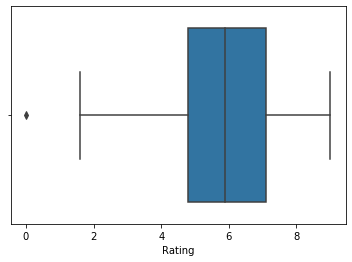

In [53]:
sn.boxplot(movie["Rating"])

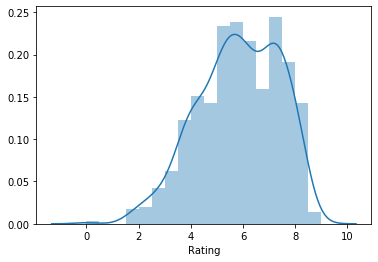

In [54]:
sn.distplot(movie["Rating"])

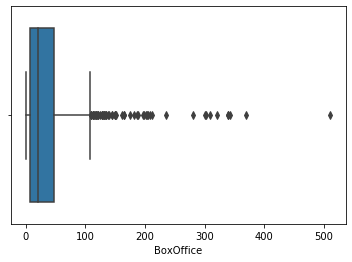

In [55]:
sn.boxplot(movie["BoxOffice"])

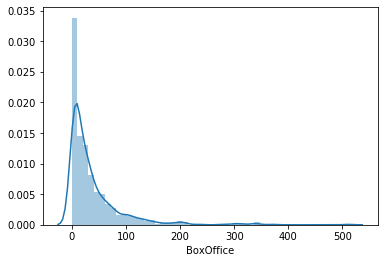

In [56]:
sn.distplot(movie["BoxOffice"])

## Introducing synthetic feature from existing features

In [57]:
movie['ratio'] = round((movie['BoxOffice']/movie['Budget']),2)  ## ratio of boxoffice wrt budget gives the profitability ratio

In [58]:
movie.head()

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,ratio
0,Batti Gul Meter Chalu,2,50.0,37.0,6.3,1552,2018,0.74
1,Dangal,6,90.0,370.0,8.5,105480,2016,4.11
2,Manmarziyaan,3,30.0,26.0,7.0,1836,2018,0.87
3,Sui Dhaaga: Made in India,4,50.0,55.0,6.9,1342,2018,1.10
4,Stree,6,25.0,127.0,8.3,7801,2018,5.08


## Understanding Correlation between all features

In [59]:
corrMatrix = movie.corr()
corrMatrix

,Target,Budget,BoxOffice,Rating,Votes,Year,ratio
Target,1.000000,0.215015,0.565052,0.339787,0.440515,-0.072464,0.898959
Budget,0.215015,1.000000,0.790225,-0.006314,0.323545,0.185546,0.141828
BoxOffice,0.565052,0.790225,1.000000,0.187246,0.534875,0.151223,0.550723
Rating,0.339787,-0.006314,0.187246,1.000000,0.385303,0.064106,0.347836
Votes,0.440515,0.323545,0.534875,0.385303,1.000000,-0.071387,0.483159
Year,-0.072464,0.185546,0.151223,0.064106,-0.071387,1.000000,-0.071906
ratio,0.898959,0.141828,0.550723,0.347836,0.483159,-0.071906,1.000000


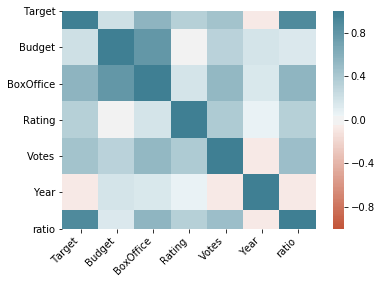

In [60]:
ax = sn.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

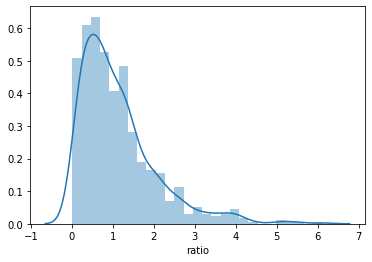

In [61]:
sn.distplot(movie['ratio'])

## Define dependent and independent variables

In [62]:
X = movie[['Target','Budget','Rating','Year','ratio']]
y = movie[['BoxOffice']]
print(X.shape, y.shape)

(703, 5) (703, 1)


## Split training and testing data 

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
print(X_train, X_test, y_train, y_test)

     Target  Budget  Rating  Year  ratio
66        4    48.0     7.8  2016   1.26
11        3    37.0     7.3  2017   1.00
248       5    19.0     3.9  2014   2.47
571       4    20.0     4.5  2011   1.25
178       1    14.0     3.2  2016   0.22
..      ...     ...     ...   ...    ...
71        6    90.0     8.0  2015   3.56
106       5    42.0     6.5  2006   1.95
270       5    47.0     5.4  2010   1.55
435       2     6.0     7.5  2010   0.50
102       5    95.0     6.9  2017   1.53

[492 rows x 5 columns]      Target  Budget  Rating  Year  ratio
495       2    60.0     3.3  2013   0.62
164       2     9.0     7.3  2014   0.78
54        1    25.0     6.1  2018   0.28
582       4    18.0     4.2  2008   1.11
608       2    24.0     3.4  2009   0.33
..      ...     ...     ...   ...    ...
42        4    50.0     8.0  2017   1.27
73        5    26.0     7.9  2012   2.04
167       2    46.0     5.3  2016   0.68
363       5    72.0     5.4  2012   1.56
696       1    10.0     4.4  2011

## Model Defination and training

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Accuracy Score

In [66]:
model.score(X_test, y_test)

0.8450978881825193

In [67]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(211, 1)


In [72]:
X_test['predicted_price'] = y_pred

C:\Users\kajal.singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
X_test.head()

,Target,Budget,Rating,Year,ratio,predicted,predicted_price
495,2,60.0,3.3,2013,0.62,62.646012,62.646012
164,2,9.0,7.3,2014,0.78,3.288408,3.288408
54,1,25.0,6.1,2018,0.28,13.906073,13.906073
582,4,18.0,4.2,2008,1.11,15.526988,15.526988
608,2,24.0,3.4,2009,0.33,3.661078,3.661078


## Scatter plot for Predicted values VS Actual values

In [74]:
y = range(y_pred.shape[0])

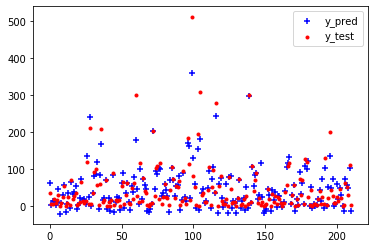

In [75]:
plt.scatter(y, y_pred, c='b', marker='+')
plt.scatter(y, y_test, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)